# IMPORTING NECESSARY LIBRARIES

In [1]:
!pip install tweet-preprocessor


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Load dataset
df = pd.read_csv('test_project.csv')
#df = df.sample(frac=0.5)


In [4]:
df.tail(10)

,Text,Emotion
21449,"Edouard looked at him , and felt a sickening dism",2
21450,When Tina and the children moved into the Scho...,2
21451,But he felt ` dismay and sorrow for so many pe...,2
21452,"They stared at one another in dismay , the sad...",2
21453,Cleo stared at the contents with dism,2
21454,Melissa stared at her friend in dism,2
21455,Successive state elections have seen the gover...,2
21456,Vincent was irritated but not dismay,2
21457,Kendall-Hume turned back to face the dismayed ...,2
21458,"I am dismayed , but not surpris",2


# DATA PREPROCESSING

In [5]:
import preprocessor as p

In [6]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [7]:
def preprocessing(a):
    tmp = []
    for line in a:
        tmp1 = p.clean(line)
        tmp1 = REPLACE_NO_SPACE.sub("", tmp1.lower()) # convert all tweets to lower cases
        tmp1 = REPLACE_WITH_SPACE.sub(" ", tmp1)
        tmp.append(tmp1)
    return tmp

In [8]:
train_data = preprocessing(df["Text"])
train_data = pd.DataFrame(train_data)

In [9]:
df["preprocessing"] = train_data

#compare normal and preprocessed data
df.head(10)

,Text,Emotion,preprocessing
0,i didnt feel humiliated,0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,0,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,1,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,0,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,0,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,2,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,2,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,1,i have been with petronas for years i feel tha...
9,i feel romantic too,1,i feel romantic too


In [10]:
'''# Lowercasing
df['text'] = df['text'].str.lower()

# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)

# Removing Punctuation
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in string.punctuation])

# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Join tokens back into sentences
df['processed_text'] = df['tokens'].apply(' '.join)

# Print the first few rows to check the result
print(df.head(20))'''



"# Lowercasing\ndf['text'] = df['text'].str.lower()\n\n# Tokenization\ndf['tokens'] = df['text'].apply(word_tokenize)\n\n# Removing Punctuation\ndf['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in string.punctuation])\n\n# Removing Stopwords\nstop_words = set(stopwords.words('english'))\ndf['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])\n\n# Stemming\nstemmer = PorterStemmer()\ndf['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])\n\n# Join tokens back into sentences\ndf['processed_text'] = df['tokens'].apply(' '.join)\n\n# Print the first few rows to check the result\nprint(df.head(20))"

In [11]:
print(df.tail(5))

                                                    Text  Emotion  \
21454               Melissa stared at her friend in dism        2   
21455  Successive state elections have seen the gover...        2   
21456               Vincent was irritated but not dismay        2   
21457  Kendall-Hume turned back to face the dismayed ...        2   
21458                    I am dismayed , but not surpris        2   

                                           preprocessing  
21454               melissa stared at her friend in dism  
21455  successive state elections have seen the gover...  
21456               vincent was irritated but not dismay  
21457  kendall hume turned back to face the dismayed ...  
21458                     i am dismayed  but not surpris  


In [12]:
# Define the mapping between emotion labels and sentiment labels
emotion_to_sentiment = {
    0: 0,  # sadness
    1: 1,  # joy
    2: 2,  # love
}

# Map emotion labels to sentiment labels and create a new column 'sentiment'
df['sentiment'] = df['Emotion'].map(emotion_to_sentiment)

# Print the first few rows to check the result
print(df.head())


                                                Text  Emotion  \
0                            i didnt feel humiliated        0   
1  i can go from feeling so hopeless to so damned...        0   
2   im grabbing a minute to post i feel greedy wrong        0   
3  i am ever feeling nostalgic about the fireplac...        1   
4                               i am feeling grouchy        0   

                                       preprocessing  sentiment  
0                            i didnt feel humiliated          0  
1  i can go from feeling so hopeless to so damned...          0  
2   im grabbing a minute to post i feel greedy wrong          0  
3  i am ever feeling nostalgic about the fireplac...          1  
4                               i am feeling grouchy          0  


In [13]:
print(df.head(50))

                                                 Text  Emotion  \
0                             i didnt feel humiliated        0   
1   i can go from feeling so hopeless to so damned...        0   
2    im grabbing a minute to post i feel greedy wrong        0   
3   i am ever feeling nostalgic about the fireplac...        1   
4                                i am feeling grouchy        0   
5   ive been feeling a little burdened lately wasn...        0   
6   ive been taking or milligrams or times recomme...        2   
7   i feel as confused about life as a teenager or...        2   
8   i have been with petronas for years i feel tha...        1   
9                                 i feel romantic too        1   
10  i feel like i have to make the suffering i m s...        0   
11  i do feel that running is a divine experience ...        1   
12  i think it s the easiest time of year to feel ...        0   
13                 i feel low energy i m just thirsty        0   
14  i have

# EDA (EXPLORATORY DATA ANALYSIS)

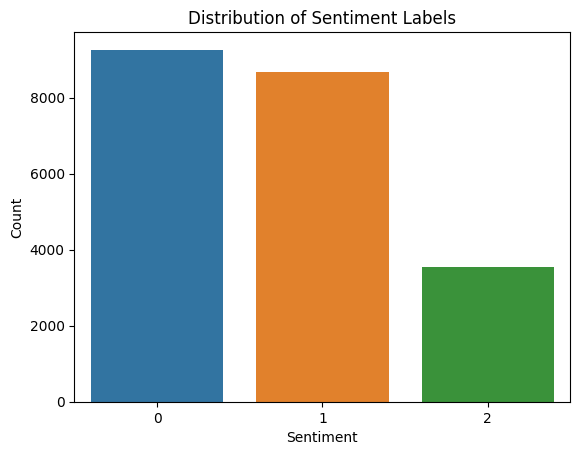

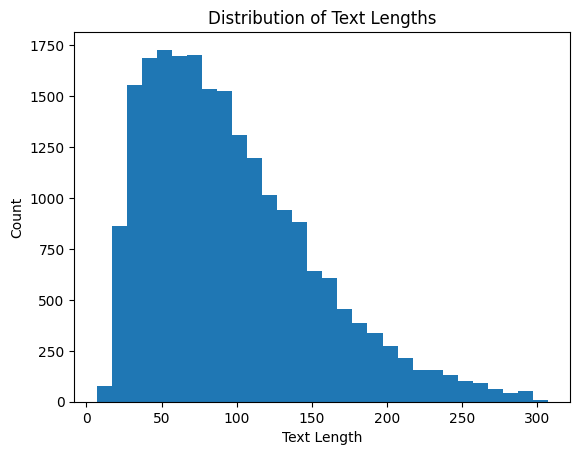

"# Explore word frequency in the dataset\nfrom collections import Counter\nwords = [word for sublist in df['preprocessing'] for word in sublist]\nword_freq = Counter(words)\ncommon_words = word_freq.most_common(20)\ncommon_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Frequency', y='Word', data=common_words_df)\nplt.title('Top 20 Most Common Words')\nplt.xlabel('Frequency')\nplt.ylabel('Word')\nplt.show()"

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
# Assuming df is your DataFrame containing the preprocessed data
# df = pd.read_csv('preprocessed_data.csv')

# Explore the distribution of sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Explore the distribution of text lengths
df['text_length'] = df['Text'].apply(len)
plt.hist(df['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

'''# Explore word frequency in the dataset
from collections import Counter
words = [word for sublist in df['preprocessing'] for word in sublist]
word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()'''


In [15]:
df.sample(10)

,Text,Emotion,preprocessing,sentiment,text_length
5765,i wish i could open up to people not feel so t...,2,i wish i could open up to people not feel so t...,2,80
2418,i feel very blessed this year my daughter and ...,1,i feel very blessed this year my daughter and ...,1,131
4834,i feel assaulted the new kid whined,2,i feel assaulted the new kid whined,2,35
185,i feel like i m always the one getting punishe...,0,i feel like i m always the one getting punishe...,0,114
14134,i were dating myself right now i d be telling ...,0,i were dating myself right now i d be telling ...,0,131
2840,i hate these feelings of not being complacent,1,i hate these feelings of not being complacent,1,45
11191,i bought myself a make up palette two months b...,1,i bought myself a make up palette two months b...,1,103
14411,i feel like a cranky old man saying this but s...,0,i feel like a cranky old man saying this but s...,0,55
7069,i honestly feel a little bit relieved,1,i honestly feel a little bit relieved,1,37
20715,"A merciful wave was closing over it , healing ...",0,a merciful wave was closing over it healing h...,0,56


In [16]:
df.columns

Index(['Text', 'Emotion', 'preprocessing', 'sentiment', 'text_length'], dtype='object')

# Preprocess the Test Set

In [17]:
#test_set = pd.read_csv('text_emotion.csv')

In [18]:
#features = df.drop(columns=['text', 'label', 'tokens', 'processed_text'])
labels = df['sentiment']


# SPLIT THE DATASET

In [19]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.preprocessing.values, labels, test_size=0.1, random_state=4, shuffle=True)



# Display the shapes of the training and testing sets
#X_train.shape # (333447, 1003)


In [20]:
X_train

array(['i could go on and on right now about what weve been through this year and what ive learned what micah could do when and such but i wont because this would be a book and honestly im not feeling fabulous today and micah has been dealing with a giant cold since thursday and we are wiped',
       'i feel like an idiotic twat for some of the things i have written in the past and for some of the things i have advertised having done',
       'i feel a divine calling to become an lsd chemist the pub shroomery message board link href smarty templates css www',
       ...,
       'i reread for comfort the familiarity of a book whose plot i already know is easier to deal with when im feeling stressed than a new to me book with all its unknowns',
       'i am feeling quite smug now as i didn t actually see any mating but assessed the signs calculated the dates etc and got it spot on',
       'i feel furious at because i really thought it was better than that'],
      dtype=object)

In [21]:
X_train.shape

(19313,)

In [22]:
print(labels.head())
print(labels.shape)



0    0
1    0
2    0
3    1
4    0
Name: sentiment, dtype: int64
(21459,)


In [23]:
'''labels_new = labels.iloc[:, 0]

print(labels_new.head())
print(labels_new.shape)'''



'labels_new = labels.iloc[:, 0]\n\nprint(labels_new.head())\nprint(labels_new.shape)'

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19313,)
(2146,)
(19313,)
(2146,)


In [25]:
print (X_train)
print (y_test)

['i could go on and on right now about what weve been through this year and what ive learned what micah could do when and such but i wont because this would be a book and honestly im not feeling fabulous today and micah has been dealing with a giant cold since thursday and we are wiped'
 'i feel like an idiotic twat for some of the things i have written in the past and for some of the things i have advertised having done'
 'i feel a divine calling to become an lsd chemist the pub shroomery message board link href smarty templates css www'
 ...
 'i reread for comfort the familiarity of a book whose plot i already know is easier to deal with when im feeling stressed than a new to me book with all its unknowns'
 'i am feeling quite smug now as i didn t actually see any mating but assessed the signs calculated the dates etc and got it spot on'
 'i feel furious at because i really thought it was better than that']
10513    2
4723     1
19586    0
8637     1
11952    2
        ..
920      0


# APPLYING FEATURE SCALING USING fit_transform() METHOD OF SCALAR OBJECT sc

In [26]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# VECTORIZATION

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)

In [29]:
x_train_vec.shape
x_test_vec.shape

(2146, 17769)

In [30]:
print(x_train_vec)

  (0, 13190)	1
  (0, 17273)	1
  (0, 17665)	1
  (0, 8283)	1
  (0, 8901)	1
  (0, 9816)	1
  (0, 17507)	1
  (0, 1751)	1
  (0, 7400)	1
  (0, 7684)	1
  (0, 5767)	1
  (0, 5609)	1
  (0, 15965)	1
  (0, 3857)	1
  (0, 6524)	1
  (0, 2855)	1
  (0, 15875)	1
  (0, 17436)	1
  (1, 5764)	1
  (1, 9054)	1
  (1, 7645)	1
  (1, 16354)	1
  (1, 15799)	1
  (1, 17602)	1
  (1, 11261)	1
  :	:
  (19310, 15046)	1
  (19310, 3855)	1
  (19310, 11726)	1
  (19310, 2922)	1
  (19310, 4867)	1
  (19310, 12989)	1
  (19310, 5667)	1
  (19310, 16604)	1
  (19311, 5767)	1
  (19311, 163)	1
  (19311, 4253)	1
  (19311, 6680)	1
  (19311, 12440)	1
  (19311, 14390)	1
  (19311, 14743)	1
  (19311, 3815)	1
  (19311, 14126)	1
  (19311, 2154)	1
  (19311, 9610)	1
  (19311, 894)	1
  (19312, 5764)	1
  (19312, 1464)	1
  (19312, 12619)	1
  (19312, 15825)	1
  (19312, 6350)	1


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19313,)
(2146,)
(19313,)
(2146,)


# TRAINING AND PREDICTION

In [32]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train_vec, y_train)



SVC(C=2, gamma='auto', kernel='linear')

In [33]:
prediction = classifier.predict(x_test_vec)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       932
           1       0.93      0.93      0.93       877
           2       0.85      0.84      0.85       337

    accuracy                           0.91      2146
   macro avg       0.90      0.90      0.90      2146
weighted avg       0.91      0.91      0.91      2146



# CROSS VALIDATION USING K FOLDS

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Perform cross-validation
cv_scores = cross_val_score(classifier, x_test_vec, y_test, cv=5)  # Adjust the number of folds as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.84418605 0.83449883 0.83916084 0.84615385 0.82517483]
Mean Accuracy: 0.8378348782999947


In [36]:
from joblib import dump, load

# Save the model and count vectorizer
dump(classifier, 'SVM_model_2.joblib')
dump(vectorizer, 'Count_vectorizer_2.joblib')

['Count_vectorizer_2.joblib']

In [37]:
svm_classifier = load('SVM_model_2.joblib')
vectorizer = load('Count_vectorizer_2.joblib')

# TESTING

In [38]:
test_set = pd.read_csv('test_sample.csv')

In [39]:
new_data = preprocessing(test_set["text"])
new_data = pd.DataFrame(new_data)

new_data.head()

,0
0,i really dont wanna stay in my house tonight i...
1,im scared of snakes
2,i love you
3,dont ever do that again
4,the way to the temple is from that side


In [40]:
test_set["preprocessing"] = new_data

#compare normal and preprocessed data
test_set.head(10)

,Unnamed: 0,text,label,preprocessing
0,0,I really don't wanna stay in my house tonight....,0,i really dont wanna stay in my house tonight i...
1,1,I'm scared of snakes,1,im scared of snakes
2,2,I love you,1,i love you
3,3,Don't ever do that again,0,dont ever do that again
4,4,The way to the temple is from that side,1,the way to the temple is from that side
5,5,I'm so disappointed with the customer service ...,0,im so disappointed with the customer service i...
6,6,"Just finished my workout, feeling energized",1,just finished my workout feeling energized
7,7,"Having a lazy day, enjoying some Netflix",1,having a lazy day enjoying some netflix
8,8,i feel my life is totally in ecstatic chaos,1,i feel my life is totally in ecstatic chaos
9,9,i feel i am being neglectful to a lot of you b...,0,i feel i am being neglectful to a lot of you b...


In [41]:
example = test_set.preprocessing.values
example
ex_output = test_set.label.values
ex_output

array([0, 1, 1, ..., 1, 2, 2], dtype=int64)

In [42]:
example_vector = vectorizer.transform(example)


In [43]:
output = classifier.predict(example_vector)

In [44]:
print(ex_output)
print(output)

[0 1 1 ... 1 2 2]
[0 2 0 ... 1 2 2]


In [45]:
my_accuracy = accuracy_score(ex_output, output)
print(f'Accuracy: {my_accuracy}')

Accuracy: 0.9730134932533733


In [46]:
testing = pd.read_csv('test.csv')

In [47]:
testing.head()

,Unnamed: 0,text,label
0,0,I really don't wanna stay in my house tonight....,0
1,1,I'm scared of snakes,1
2,2,I love you,1
3,3,Don't ever do that again,0
4,4,The way to the temple is from that side,1


In [48]:
example_vector1 = vectorizer.transform(example)


In [49]:
ans = svm_classifier.predict(example_vector1)

In [50]:
comparison = accuracy_score(ex_output, ans)
print(f'Accuracy: {comparison}')

Accuracy: 0.9730134932533733
